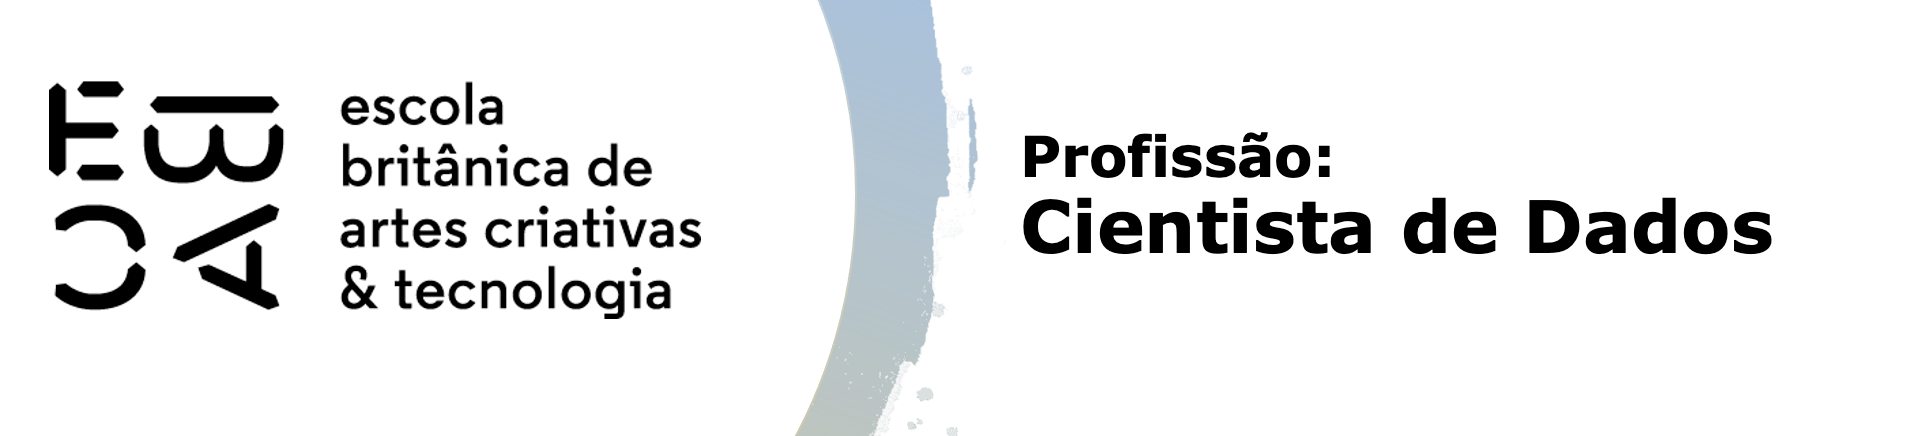

# Probabilidade - Tarefa

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from scipy.stats import norm
from scipy import stats
from decimal import *

1. Uma máquina embala ração para cachorro em pacotes de 15 kg, mas cada pacote produzido acaba tendo um peso aleatório, com distribuição Normal, com média 15kg, mas com desvio padrão 0,1 kg. Obtenha a probabilidade de que um pacote selecionado aleatoriamente dessa produção tenha mais que 15,2 kg.

A probabilidade para valores entre 15,20 e inf é de 2,28%


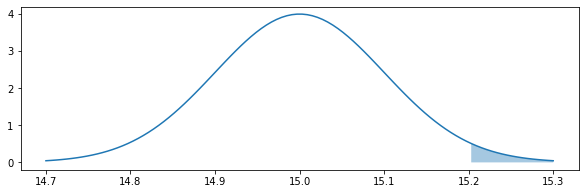

In [2]:
fig, ax = plt.subplots(figsize =(10, 3))

mu = 15
sigma = 0.1 # desvio padrão
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
cdf = stats.norm.cdf(x, mu, sigma )
ax.plot(x, y)

std_lim = +np.inf
low = 15.2
high = mu+std_lim*sigma

plt.fill_between(x, y, where=(low < x) & (x < high), alpha=.4)

prob_area = norm.cdf(high, mu, sigma) - norm.cdf(low, mu, sigma)

print(f'A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.2%}'.replace('.',','))

In [3]:
(1-0.9554)/2 # Distribuição de Probabilidade Contínua

0.022299999999999986

2. Da máquina descrita acima, obtenha o percentil de ordem 95% para o peso dos pacotes. Ou seja, o valor tal que a probabilidade de um pacote ter peso menor que este seja de 95%.

A probabilidade para valores entre 14,80 e 15,20 é de 95,45%


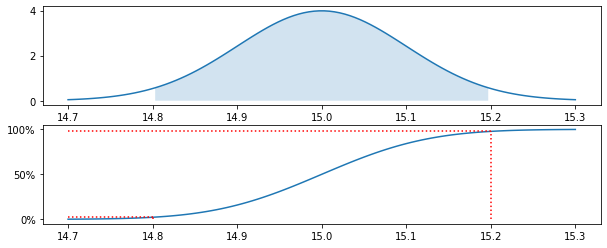

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(10,4))

mu = 15
variance = 0.01
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
cdf = stats.norm.cdf(x, mu, sigma)
ax[1].plot(x, cdf)

low = 14.8
high = 15.2


ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax[1].vlines(x=[high], 
             ymin=0, ymax=stats.norm.cdf(high, mu, sigma), 
             colors='r', linestyles='dotted')
ax[1].hlines(y=stats.norm.cdf(high, mu, sigma), 
             xmin=mu - 3*sigma, xmax=high, 
             colors='r', linestyles='dotted')
ax[1].vlines(x=[low], 
             ymin=0, ymax=stats.norm.cdf(low, mu, sigma), 
             colors='r', linestyles='dotted')
ax[1].hlines(y=stats.norm.cdf(low, mu, sigma), 
             xmin=mu - 3*sigma, xmax=low, 
             colors='r', linestyles='dotted')

prob_area = norm.cdf(high, mu, sigma) - norm.cdf(low, mu, sigma)
print(f'A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.2%}'.replace('.',','))

y = stats.norm.pdf(x, mu, sigma)
ax[0].plot(x, y)
ax[0].fill_between(x, y, where=(low < x) & (x < high), alpha=.2)
# plt.text(low, 0, low, ha='center')
# plt.text(high, 0, high, ha='center')


3. Suponha duas variáveis aleatórias $Y_1$ e $Y_2$, a primeira com distribuição Normal Padrão (média=0, variância=1), a segunda com distribuição *t-studdent* com 5 graus de liberdade (também padrão). Calcule, para cada uma, a probabilidade de ser menor que cada um dos valores contidos no objeto $Y$ na célula abaixo:

In [6]:
Y=np.linspace(-6, 6, 200)
# Seu código começa aqui
mu = 0
variance = 1
sigma = math.sqrt(variance)
low = -6
n = 5
df = pd.DataFrame(Y)
df.rename(columns={0:'Y'}, inplace=True)

df['P(Y1)<Y'] = (norm.cdf(df['Y'],mu, sigma)- norm.cdf(low, mu, sigma))
df['P(Y2)<Y'] = stats.t.cdf(df['Y'], n-1)
df

,Y,P(Y1)<Y,P(Y2)<Y
0,-6.000000,0.000000e+00,0.001941
1,-5.939698,4.411461e-10,0.002014
2,-5.879397,1.072231e-09,0.002091
3,-5.819095,1.971759e-09,0.002171
4,-5.758794,3.249264e-09,0.002255
...,...,...,...
195,5.758794,1.000000e+00,0.997745
196,5.819095,1.000000e+00,0.997829
197,5.879397,1.000000e+00,0.997909
198,5.939698,1.000000e+00,0.997986


4. Faça uma visualização gráfica dos dados do item anterior.

In [7]:
Y1 = norm.cdf(Y,mu, sigma)- norm.cdf(-6, mu, sigma)
Y2 = stats.t.cdf(df['Y'], n-1)

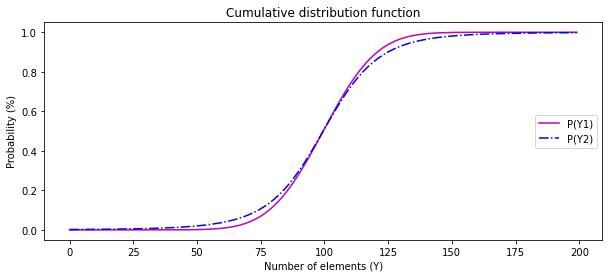

In [8]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(Y1, 'm-', linewidth=1.5, label = 'P(Y1)')
ax.plot(Y2, 'b-.', linewidth=1.5, label = 'P(Y2)')
ax.set_title('Cumulative distribution function')
ax.set_xlabel('Number of elements (Y)')
ax.set_ylabel('Probability (%)')
ax.legend(loc= 'right')

plt.show()

5. 3. Suponha duas variáveis aleatórias $Y_1$ e $Y_2$, a primeira com distribuição Normal Padrão (média=0, variância=1), a segunda com distribuição *t-studdent* com 5 graus de liberdade (também padrão). Calcule, para cada uma, o percentil (a inversa da *CDF*) para cada um dos valores do objeto *P* abaixo:

In [9]:
Y=np.linspace(0, 1, 20)
# Seu código começa aqui
mu = 0
variance = 1
sigma = math.sqrt(variance)
n = 5
df = pd.DataFrame(Y)
df.rename(columns={0:'Y'}, inplace=True)
df['P(Y1)'] = stats.norm.pdf(df['Y'],mu, sigma)
df['P(Y2)'] = stats.t.pdf(df['Y'], n-1)
df

,Y,P(Y1),P(Y2)
0,0.000000,0.398942,0.375000
1,0.052632,0.398390,0.374352
2,0.105263,0.396738,0.372416
3,0.157895,0.394000,0.369220
4,0.210526,0.390199,0.364810
5,0.263158,0.385365,0.359248
6,0.315789,0.379538,0.352610
7,0.368421,0.372766,0.344985
8,0.421053,0.365101,0.336470
9,0.473684,0.356605,0.327171


6. Faça um gráfico com os dados do item anterior.

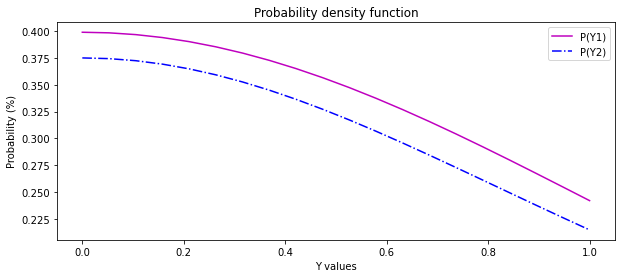

In [13]:
x = np.linspace(0, 1, 20)
Y1 = stats.norm.pdf(Y,mu, sigma)
Y2 = stats.t.pdf(df['Y'], n-1)

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x, Y1, 'm-', linewidth=1.5, label = 'P(Y1)')
ax.plot(x, Y2, 'b-.', linewidth=1.5, label = 'P(Y2)')
ax.set_title('Probability density function')
ax.set_xlabel('Y values')
ax.set_ylabel('Probability (%)')
ax.legend(loc= 'upper right')

plt.show()